In [1]:
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# load merged dataset
data = pickle.load(open('./sps_spotinfo_df.pkl', 'rb'))

In [3]:
# frequency score mapping
frequency_map = {'<5%': 5, '5-10%': 4, '10-15%': 3, '15-20%': 2, '>20%': 1}
data = data.replace({'Frequency': frequency_map})

### 01. FS-SPS Pair Frequency Heatmap

In [4]:
# count FS(Frequency Score)-SPS pair
score_freq = []
for freq in range(1, 6):
    score_list = []
    for score in range(1, 4):
        condition = ((data['Score'] == score)&
                     (data['Frequency'] == freq))
        num = len(data[condition])
        score_list.append(num)
        print(f"{freq} - {score} : {num}")
    score_freq.append(score_list)

1 - 1 : 1666967
1 - 2 : 416226
1 - 3 : 6355076
2 - 1 : 436133
2 - 2 : 148776
2 - 3 : 1968897
3 - 1 : 643895
3 - 2 : 263620
3 - 3 : 4441490
4 - 1 : 741711
4 - 2 : 306106
4 - 3 : 8307032
5 - 1 : 582991
5 - 2 : 180635
5 - 3 : 9923977


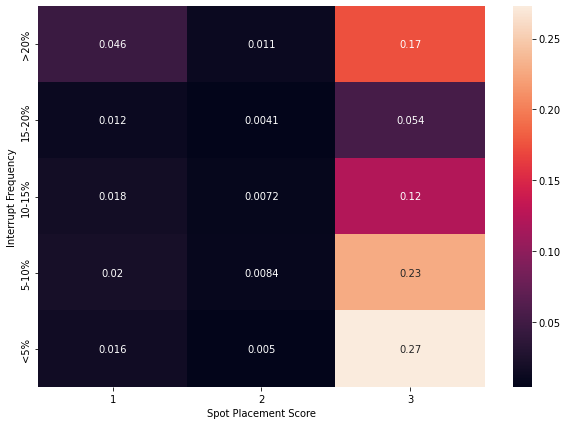

In [5]:
plt.figure(figsize=(10, 7))
sum_score_freq = sum([sum(x) for x in score_freq])
norm_score_freq = [[x/sum_score_freq for x in l] for l in score_freq]

heatmap = sb.heatmap(norm_score_freq, annot=True)
heatmap.set_xticklabels(['1', '2', '3'])
heatmap.set_yticklabels(['>20%', '15-20%', '10-15%', '5-10%', '<5%'])
heatmap.set_xlabel('Spot Placement Score')
heatmap.set_ylabel('Interrupt Frequency')
plt.show()

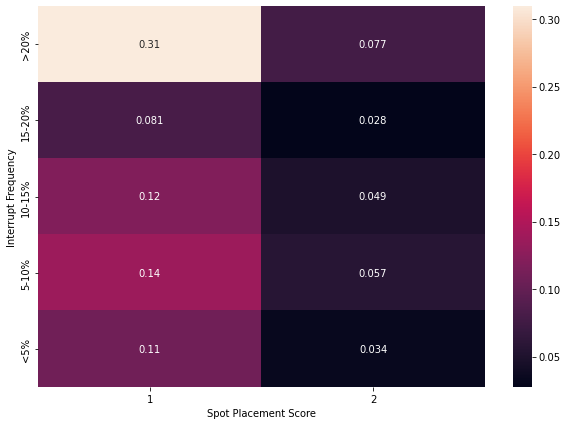

In [6]:
plt.figure(figsize=(10, 7))
sps_only_1_2 = [sublist[:2] for sublist in score_freq]
sum_score_freq = sum([sum(x) for x in sps_only_1_2])
norm_score_freq = [[x/sum_score_freq for x in l] for l in sps_only_1_2]

heatmap = sb.heatmap(norm_score_freq, annot=True)
heatmap.set_xticklabels(['1', '2'])
heatmap.set_yticklabels(['>20%', '15-20%', '10-15%', '5-10%', '<5%'])
heatmap.set_xlabel('Spot Placement Score')
heatmap.set_ylabel('Interrupt Frequency')
plt.show()

### 02. Select Main Instance Families & Regions

In [7]:
# check number of available regions by instance family
instance_types = data['InstanceType']
instance_families = instance_types.str.split('.').str[0]
data['InstanceFamily'] = instance_families

family_df = data[['InstanceFamily', 'Region', 'Score', 'Frequency', 'Price']]
groupby_family = family_df.groupby(by=['InstanceFamily', 'Region']).mean().sort_values(by='InstanceFamily')

family_num_region = []
for family in sorted(list(set([x[0] for x in list(groupby_family.index)]))):
    num_of_regions = len(groupby_family.loc[family])
    family_num_region.append((family, num_of_regions))

print(family_num_region)

[('a1', 9), ('c1', 7), ('c3', 9), ('c4', 15), ('c5', 17), ('c5a', 16), ('c5ad', 8), ('c5d', 17), ('c5n', 16), ('c6g', 16), ('c6gd', 12), ('c6gn', 5), ('c6i', 4), ('d2', 16), ('d3', 10), ('d3en', 3), ('dl1', 2), ('f1', 6), ('g2', 7), ('g3', 12), ('g3s', 9), ('g4ad', 8), ('g4dn', 16), ('g5', 3), ('h1', 4), ('i2', 11), ('i3', 17), ('i3en', 17), ('inf1', 16), ('m1', 8), ('m2', 6), ('m3', 9), ('m4', 15), ('m5', 17), ('m5a', 15), ('m5ad', 15), ('m5d', 17), ('m5dn', 7), ('m5n', 7), ('m5zn', 11), ('m6g', 16), ('m6gd', 11), ('m6i', 13), ('p2', 10), ('p3', 11), ('p3dn', 4), ('p4d', 7), ('r3', 12), ('r4', 16), ('r5', 17), ('r5a', 15), ('r5ad', 15), ('r5b', 8), ('r5d', 17), ('r5dn', 7), ('r5n', 16), ('r6g', 16), ('r6gd', 9), ('t1', 8), ('t2', 16), ('t3', 17), ('t3a', 15), ('t4g', 16), ('vt1', 4), ('x1', 15), ('x1e', 13), ('x2gd', 4), ('z1d', 12)]


In [8]:
# main regions with seoul
main_regions = list(data['Region'].value_counts()[:8].index)
main_regions.append('ap-northeast-2')
print(main_regions)

['us-east-1', 'us-west-2', 'eu-west-1', 'us-east-2', 'eu-central-1', 'ap-southeast-1', 'ap-northeast-1', 'ap-southeast-2', 'ap-northeast-2']


In [9]:
# main family list
main_family = []
for family in sorted(list(set([x[0] for x in list(groupby_family.index)]))):
    family_regions = list(groupby_family.loc[family].index)
    if len([x for x in main_regions if x not in family_regions]) == 0:
        main_family.append(family)
print(f"Main Family Num: {len(main_family)}")
print(f"Main Family List: {main_family}")

Main Family Num: 38
Main Family List: ['c4', 'c5', 'c5a', 'c5d', 'c5n', 'c6g', 'd2', 'g3', 'g4dn', 'i2', 'i3', 'i3en', 'inf1', 'm4', 'm5', 'm5a', 'm5ad', 'm5d', 'm5zn', 'm6g', 'm6i', 'p2', 'p3', 'r3', 'r4', 'r5', 'r5a', 'r5ad', 'r5d', 'r5n', 'r6g', 't2', 't3', 't3a', 't4g', 'x1', 'x1e', 'z1d']


### 03. Heatmap of FS & SPS

In [10]:
heatmap_freq = []
heatmap_score = []

for family in main_family:
    family_freq = []
    family_score = []
    for region in main_regions:
        condtion = (family, region)
        family_freq.append(groupby_family.loc[condtion]['Frequency'])
        family_score.append(groupby_family.loc[condtion]['Score'])
        
    heatmap_freq.append(family_freq)
    heatmap_score.append(family_score)

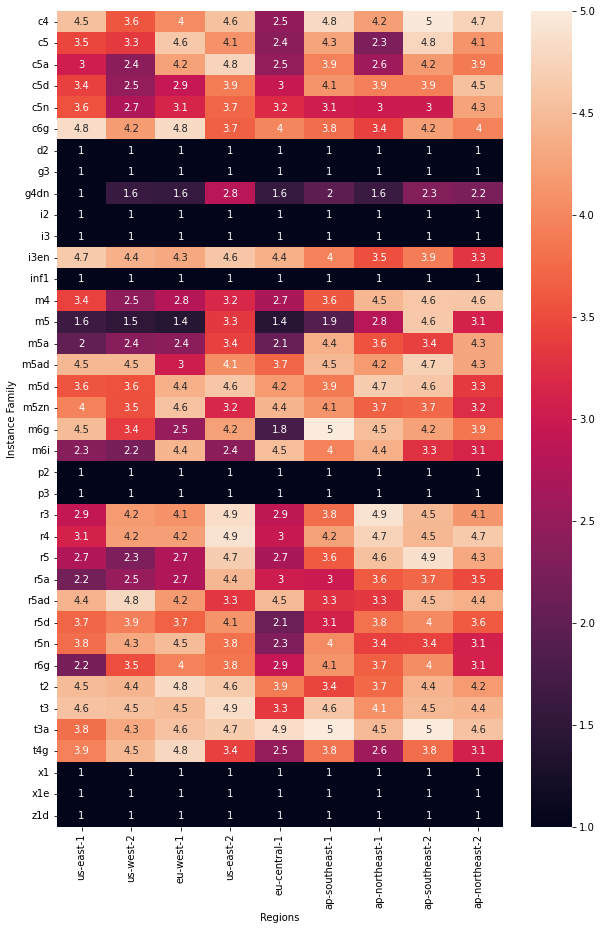

In [11]:
plt.figure(figsize=(10, 15))
heatmap = sb.heatmap(heatmap_freq, annot=True)
heatmap.set_xticklabels(main_regions, rotation='vertical')
heatmap.set_yticklabels(main_family, rotation='horizontal')
heatmap.set_xlabel('Regions')
heatmap.set_ylabel('Instance Family')
plt.show()

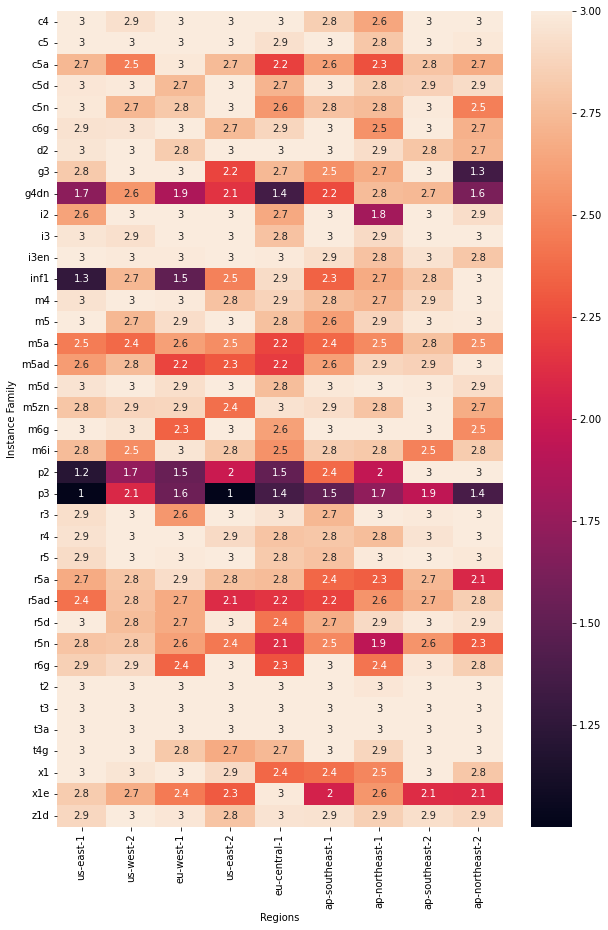

In [12]:
plt.figure(figsize=(10, 15))
heatmap = sb.heatmap(heatmap_score, annot=True)
heatmap.set_xticklabels(main_regions, rotation='vertical')
heatmap.set_yticklabels(main_family, rotation='horizontal')
heatmap.set_xlabel('Regions')
heatmap.set_ylabel('Instance Family')
plt.show()